In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Annual/ALL_SILH_SUIK_RT_ANNUAL_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Annual/ALL_SILH_SUIK_RT_ANNUAL_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,20180930,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015,Unnamed: 5016,Unnamed: 5017,Unnamed: 5018,Unnamed: 5019
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
3,Item,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,...,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F,S41000170F
4,Item Name,수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),...,수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%),수익률(%)
5,Frequency,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,...,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY,YEARLY
6,1990-12-31,-18.12,-22.28,-2.56,-18.15,32.24,NaN,16.02,-20.00,-22.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [5]:
per_df = Ko.Preprocessing(raw_per, column = '심볼', drop_limit=2)

In [9]:
len(per_df)

4158

# 수익률 DF 전처리

In [11]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼', drop_limit=2).apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [12]:
rt_df.head()

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,0.8188,0.8689,0.9717,1.0400,1.2105,0.7921,0.7560,0.5406,0.3468,0.6840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000011,0.7772,0.7772,0.7772,0.7772,1.1287,1.1287,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,0.8185,0.8322,1.4148,1.2452,2.2504,0.5620,0.9526,0.2715,2.5781,1.0949,...,0.5765,1.2265,0.6979,0.7713,1.4804,0.7268,1.2688,1.4614,0.9975,1.2007
A000021,1.3224,1.3224,1.3871,1.0697,1.0697,0.8054,0.9375,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000030,0.8000,0.8833,0.9528,0.8731,0.9847,0.9810,0.7216,0.5345,0.2705,0.5818,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6494,0.8820,1.4456,1.2353


# 포트폴리오 구성 수행

In [13]:
data = Ko.portfolio_selection(per_df)

In [25]:
data.head(10)

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,x,4,4,2,3,6,4,2,4,1,...,x,x,x,x,x,x,x,x,x,x
A000011,x,4,3,-22.28,12.87,5,8,x,x,x,...,x,x,x,x,x,x,x,x,x,x
A000020,x,4,4,7,5,9,1,5,1,8,...,7,6,3,1,3,8,1,7,6,5
A000021,x,9,9,7,3,4,5,5,x,x,...,x,x,x,x,x,x,x,x,x,x
A000030,x,4,5,2,1,3,7,2,4,-41.82,...,4,9,2,4,6,4,4,1,2,8
A000031,x,3,3,-22.8,10.01,5,8,x,x,x,...,x,x,x,x,x,x,x,x,x,x
A000040,x,3,79.13,8,4,2,4,8,-33.34,2,...,6,2,7,6,6,2,3,9,5,1
A000041,x,8,7,4,3,4,8,8,9,x,...,x,x,x,x,x,x,x,x,x,x
A000042,x,6,5,1,1,2,6,5,7,x,...,x,x,x,x,x,x,x,x,x,x
A000050,x,7,7,4,5,6,3,6,3,4,...,7,2,8,4,3,6,8,8,4,2


In [15]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [16]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
result.min()

GROUP_0    0.000000
GROUP_1    0.329875
GROUP_2    0.365713
GROUP_3    0.342279
GROUP_4    0.424477
GROUP_5    0.550971
GROUP_6    0.541943
GROUP_7    0.535887
GROUP_8    0.500660
GROUP_9    0.535039
dtype: float64

In [18]:
result.max()

GROUP_0    1.000000
GROUP_1    5.407540
GROUP_2    3.108496
GROUP_3    3.258192
GROUP_4    2.332470
GROUP_5    2.369294
GROUP_6    2.198164
GROUP_7    2.260272
GROUP_8    2.126391
GROUP_9    1.893526
dtype: float64

# 1990년대

In [19]:
result.head(10)

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
1990-12-31,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1991-12-31,NaN,0.724601,0.770852,0.749784,0.812638,0.787699,0.810619,0.842527,0.902515,1.583327
1992-12-31,NaN,1.392357,1.135162,1.047128,1.135862,0.995315,1.017405,1.049781,1.131779,1.646690
1993-12-31,NaN,1.159038,1.155876,1.175378,1.199413,1.123976,1.240731,1.331913,1.304228,1.528827
1994-12-31,NaN,1.026189,1.013209,1.082217,1.069335,1.331211,1.227615,1.235208,1.220102,1.288446
1995-12-31,NaN,0.749529,0.701345,0.725480,0.626154,0.687417,0.725443,0.705616,0.677467,0.731265
1996-12-31,NaN,0.990435,0.887515,0.808395,0.695299,0.741891,0.759534,0.677333,0.727777,0.855510
1997-12-31,0.0,0.329875,0.365713,0.342279,0.424477,0.593369,0.594439,0.649845,0.561842,0.546948
1998-12-31,0.0,1.938941,1.854099,1.650211,1.438032,1.321291,1.127522,0.980498,0.881281,0.686669
1999-12-31,0.0,5.407540,3.108496,3.258192,2.284785,2.103740,1.606318,1.403618,1.402253,1.213081


Text(0.5,1,'Performance result by PER Group')

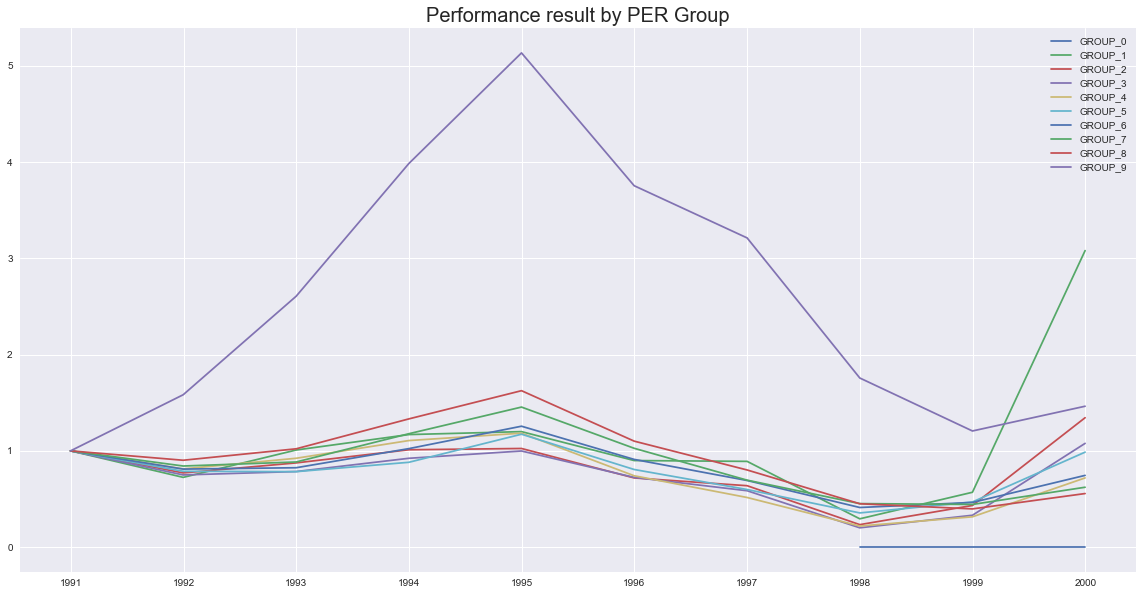

In [20]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:10].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

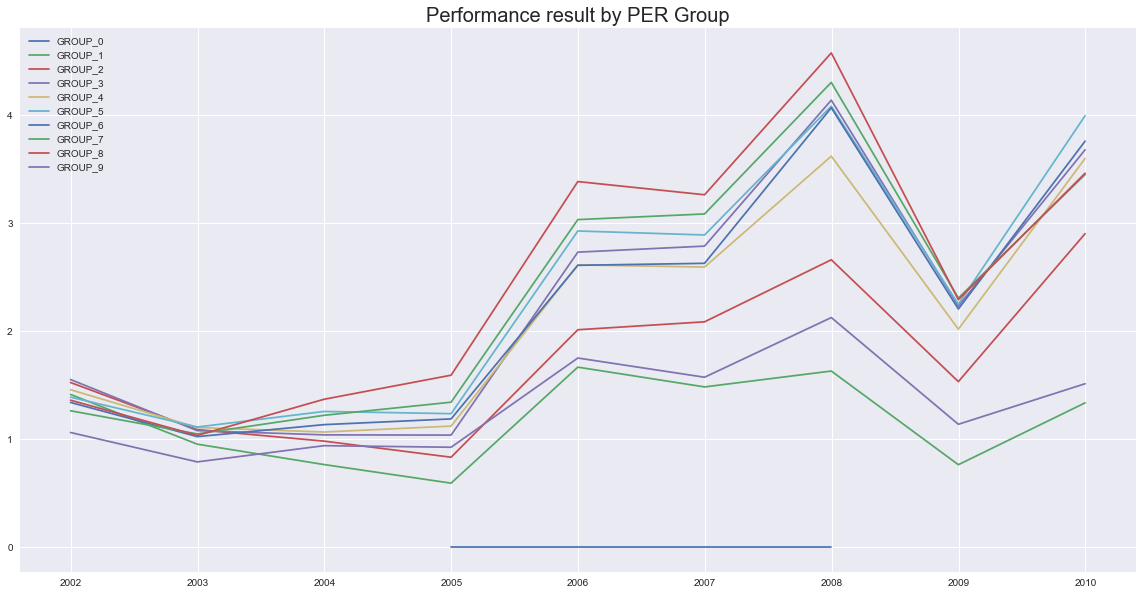

In [21]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[11:20].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

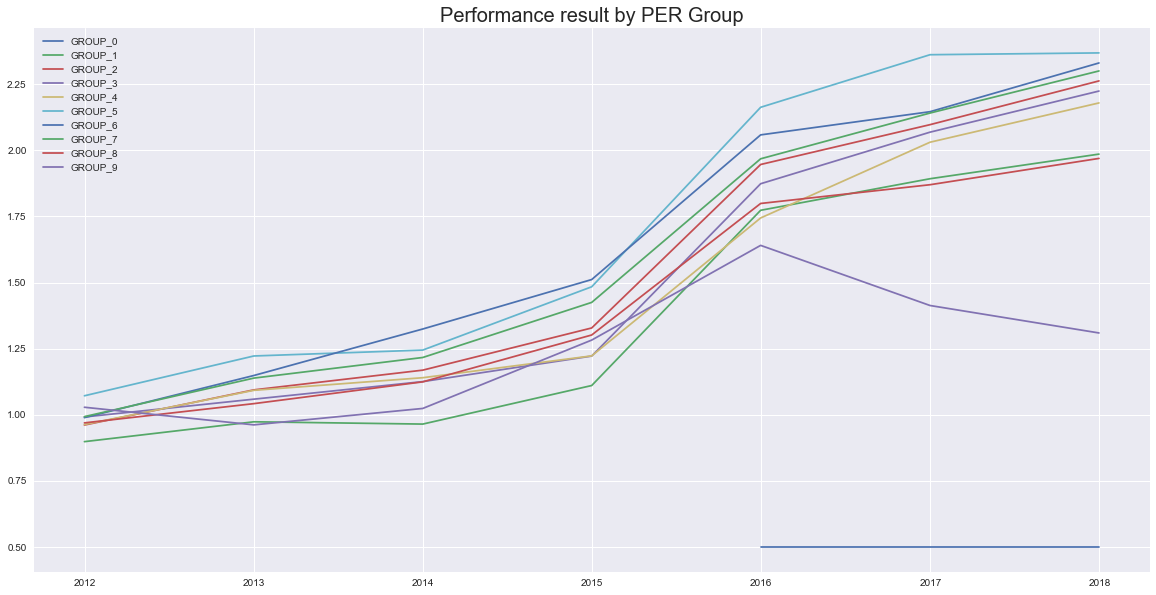

In [22]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[21:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

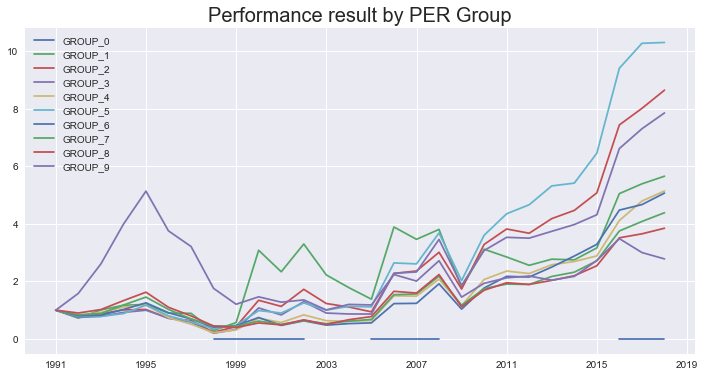

In [23]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\Dong\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

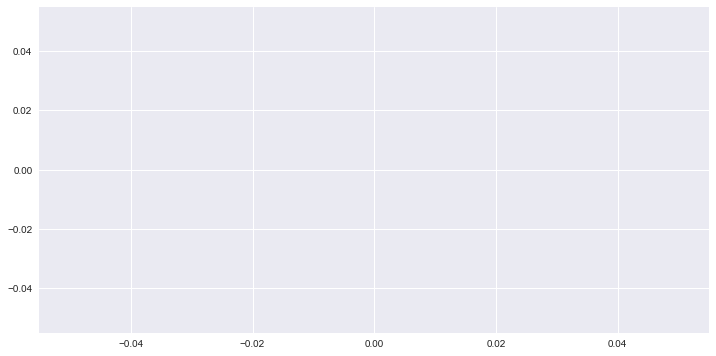

In [24]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [ ]:
result.describe().apply(lambda x: round(x,3))